In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

In [9]:
import cnn
from data_augment import part1_transform
from dataloader import NoseKeypointDataset
from display import *
from learn import test, train

In [10]:
ROOT_DIR = Path("imm_face_db")

# Initialite Datasets

# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = NoseKeypointDataset(
    idxs=np.arange(33), root_dir=ROOT_DIR, transform=part1_transform
)
assert len(training_set) == 192

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = NoseKeypointDataset(
    idxs=np.arange(32, 40), root_dir=ROOT_DIR, transform=part1_transform
)
assert len(validation_set) == 48

# Initialize Dataloaders
train_loader = DataLoader(training_set, batch_size=8, shuffle=True)
test_loader = DataLoader(validation_set, batch_size=8, shuffle=False)

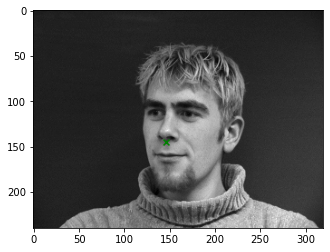

In [11]:
show_keypoints(training_set[2][0], training_set[2][1])

  0%|          | 0/6 [00:00<?, ?it/s]

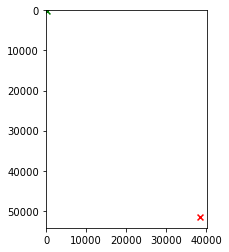

  0%|          | 0/6 [00:00<?, ?it/s]


TypeError: min() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, ), but expected one of:
 * ()
 * (name dim, bool keepdim)
      didn't match because some of the keywords were incorrect: out, axis
 * (Tensor other)
 * (int dim, bool keepdim)
      didn't match because some of the keywords were incorrect: out, axis


In [12]:
# Training and Testing

epochs = 15
loss_per_epoch = []
for ep in range(epochs):
    trained_model, train_loss = train(
        train_loader, model=cnn.NoseFinder(), learning_rate=1e-3
    )
    valid_loss = test(test_loader, trained_model, show_every=1)
    
    print_epoch(ep, train_loss, valid_loss)
    loss_per_epoch.append([train_loss, valid_loss])